In [1]:
from bs4 import BeautifulSoup
import requests 
import csv

In [2]:
url=input("Please enter url\n")

Please enter url
https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&otracker=clp_metro_expandable_5_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q0QIS4SPJNLH_wp3&fm=neo%2Fmerchandising&iid=M_c59a68bf-abb0-414d-a5a1-c7cc6ccdb202_3.Q0QIS4SPJNLH&ppt=browse&ppn=browse&ssid=b3fqp623lc0000001638369228009


In [3]:
file=open('flipkart2.csv','w',encoding='utf-8')
fieldnames=['name','price','rating','count_rating']

In [4]:
#Scrapper
number_of_pages=4
product=[]
p_price=[]
rating=[]
apps = []                               
os = []                  
hd = [] 
sound = []
reviews=[]
for i in range(1,number_of_pages):
    j=str(i)
    #print(j)
    page=requests.get(url)

    soup=BeautifulSoup(page.content,'html.parser')

    content=soup.find_all('div',class_='_3pLy-c row')
    for item in content:
        item_name=item.find('div',class_='_4rR01T')
        item_price=item.find('div',class_='_30jeq3 _1_WHN1')
        item_rating=item.find('div', attrs={'class':'_3LWZlK'})
        specification = item.find('div', attrs={'class':'fMghEO'})
        #rating_reviews=item.find('span',class_='_38sUEc')
        for each in specification:
            col=each.find_all('li', attrs={'class':'rgWa7D'})
            app =col[0].text
            os_ = col[1].text
            hd_ = col[2].text
            sound_ = col[3].text
        #if item_name is not None:
        #textlist=rating_reviews.text.split()
        product.append(item_name.text) # Add product name to list
        p_price.append(item_price.text) # Add price to list
        rating.append(item_rating.text)#Add rating
        apps.append(app)# Add supported apps specifications to list
        os.append(os_) # Add operating system specifications to list
        hd.append(hd_) # Add resolution specifications to list
        sound.append(sound_) # Add sound specifications to list
        #reviews.append(textlist)
            
'''writer=csv.DictWriter(file,fieldnames=fieldnames)
writer.writeheader()
writer.writerows(item_list)
file.flush()
file.close()'''
print(len(product))
print(len(rating))
print(len(p_price))
print(len(apps))
print(len(sound))
print(len(os))
print(len(hd))

72
72
72
72
72
72
72


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.DataFrame({'Product_Name':product,'Ram_Rom':apps,'battery':sound,'display':os,"Resolution":hd,'Price':p_price,'Rating':rating})

In [35]:
df

,Product_Name,Ram_Rom,battery,display,Resolution,Price,Rating
0,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,"₹14,999",4.3
1,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,"₹14,999",4.3
2,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Battery,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,"₹11,499",4.2
3,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Battery,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,"₹11,499",4.2
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,"₹12,999",4.3
...,...,...,...,...,...,...,...
67,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,"₹17,830",4.3
68,"SAMSUNG Galaxy A52s 5G (Awesome Mint, 128 GB)",8 GB RAM | 128 GB ROM,4500 mAh Battery,16.51 cm (6.5 inch) Display,64MP Rear Camera,"₹32,849",4.3
69,"SAMSUNG Galaxy M32 (Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,"₹17,719",4.3
70,"SAMSUNG Galaxy A52 (Awesome Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4500 mAh Lithium-ion Battery,16.51 cm (6.5 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,"₹28,730",4.3


In [8]:

from textblob import TextBlob
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

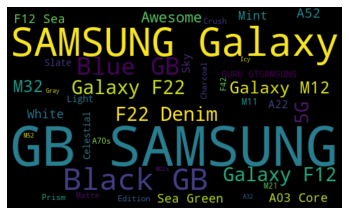

In [9]:
#plot the word cloud
allWords = ''.join([twts for twts in df['Product_Name']])
wordCloud = WordCloud(width = 500,height =300,random_state = 21,max_font_size =119).generate(allWords)
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [10]:
def getCleanedText(text):
    text=text.lower()
    tokenizer=RegexpTokenizer(r'\w+')
    ps=PorterStemmer()
    en_stop=set(stopwords.words('english'))
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in en_stop]
    stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

In [36]:
df['Price']=df['Price'].apply(getCleanedText)

In [37]:
df

,Product_Name,Ram_Rom,battery,display,Resolution,Price,Rating
0,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,14 999,4.3
1,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,14 999,4.3
2,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Battery,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,11 499,4.2
3,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Battery,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,11 499,4.2
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,6000 mAh Lithium-ion Battery,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,12 999,4.3
...,...,...,...,...,...,...,...
67,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,17 830,4.3
68,"SAMSUNG Galaxy A52s 5G (Awesome Mint, 128 GB)",8 GB RAM | 128 GB ROM,4500 mAh Battery,16.51 cm (6.5 inch) Display,64MP Rear Camera,32 849,4.3
69,"SAMSUNG Galaxy M32 (Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,6000 mAh Battery,16.26 cm (6.4 inch) Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,17 719,4.3
70,"SAMSUNG Galaxy A52 (Awesome Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,4500 mAh Lithium-ion Battery,16.51 cm (6.5 inch) Full HD+ Display,64MP + 12MP + 5MP + 5MP | 32MP Front Camera,28 730,4.3


In [38]:
new_df = df[['Product_Name', 'Rating','Resolution']].copy()

In [39]:
new_df

,Product_Name,Rating,Resolution
0,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",4.3,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
1,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",4.3,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
2,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.2,48MP + 5MP + 2MP + 2MP | 8MP Front Camera
3,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4.2,48MP + 5MP + 2MP + 2MP | 8MP Front Camera
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4.3,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
...,...,...,...
67,"SAMSUNG Galaxy M32 (Light Blue, 128 GB)",4.3,64MP + 8MP + 2MP + 2MP | 20MP Front Camera
68,"SAMSUNG Galaxy A52s 5G (Awesome Mint, 128 GB)",4.3,64MP Rear Camera
69,"SAMSUNG Galaxy M32 (Black, 128 GB)",4.3,64MP + 8MP + 2MP + 2MP | 20MP Front Camera
70,"SAMSUNG Galaxy A52 (Awesome Black, 128 GB)",4.3,64MP + 12MP + 5MP + 5MP | 32MP Front Camera


In [40]:
new_df.describe()

,Product_Name,Rating,Resolution
count,72,72,72
unique,31,5,16
top,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",4.2,48MP + 8MP + 2MP + 2MP | 13MP Front Camera
freq,3,33,13


In [41]:
new_df['Rating'].value_counts(normalize=True)

4.2    0.458333
4.3    0.347222
4.4    0.097222
4.1    0.083333
5      0.013889
Name: Rating, dtype: float64

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
X_cv=cv.fit_transform(df['Resolution']).toarray()
X=X_cv
y=df['Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
RF=RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)
print("Train Accuracy",RF_model.score(X_train,y_train))
print("Test Accuracy",RF_model.score(X_test,y_test))

Train Accuracy 0.9824561403508771
Test Accuracy 1.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4.3'),
  Text(1, 0, '4.2'),
  Text(2, 0, '4.4'),
  Text(3, 0, '4.1'),
  Text(4, 0, '5')])

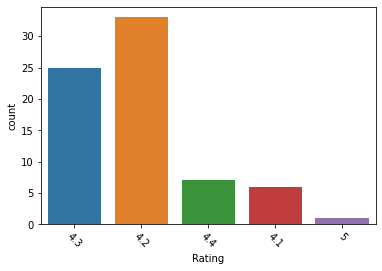

In [43]:
sns.countplot(x='Rating', data=new_df)
plt.xticks(rotation=-45)

In [46]:
new_df['Rating'] = pd.to_numeric(new_df['Rating'],errors='coerce')

In [57]:
try:
    for ret in new_df['Rating']:
        if ret>4:
            pos=(new_df['Product_Name'] +'  Positive')
        elif ret<4 and ret >3.5:
            avg=(new_df['Product_Name'] +'Average')
        else:
            neg=(new_df['Product_Name'] +'Not good')
    print(pos)
    print(avg)
    print(neg)
except:
    None

0     SAMSUNG Galaxy F22 (Denim Black, 128 GB)  Posi...
1     SAMSUNG Galaxy F22 (Denim Blue, 128 GB)  Positive
2        SAMSUNG Galaxy F12 (Sky Blue, 64 GB)  Positive
3     SAMSUNG Galaxy F12 (Celestial Black, 64 GB)  P...
4      SAMSUNG Galaxy F22 (Denim Blue, 64 GB)  Positive
                            ...                        
67    SAMSUNG Galaxy M32 (Light Blue, 128 GB)  Positive
68    SAMSUNG Galaxy A52s 5G (Awesome Mint, 128 GB) ...
69         SAMSUNG Galaxy M32 (Black, 128 GB)  Positive
70    SAMSUNG Galaxy A52 (Awesome Black, 128 GB)  Po...
71       SAMSUNG M32 5G (Slate Black, 128 GB)  Positive
Name: Product_Name, Length: 72, dtype: object
